 <h2><center><font color ='Red'>Section-5: Basic CNN with Data Augmentation(Convolutional Model) and Transfer Learning Using VGG19</font></center></h2>

Keras with Tensorflow framework is used in this section for building a Fully connected neural network and Convolutional neural network.

In this section the following two are the neural networks build for classifying the hair color of the celb-a Dataset:
1. Convolutional neural network
2. Transfer Learning with VGG19

<h4><font color ='brown'>Why Fully connected Neural Networks is not Useful?</font></h4>

Dis-advantages of Fully Connected Neural Networks:
1. When a model is trained on an image for example lets take a CAT, then we had given the same image for prediction but flipped the image. In this case the model classifies an image as cat if it matches exactly (including position) and miscalssifies the flipped image as not cat eventhough it is a cat.
2. The Fully connected neural networks are computationally expensive. Since each input feature is connected to every neuron in the following layer and the trend continues till the Output layer.
3. This is why I didnt included the Fully connected Model in the Final Submission.

Source: https://www.quora.com/What-are-the-advantages-and-disadvantages-of-fully-connected-layers-in-convolutional-neural-network

<h4><font color ='brown'>About connected Neural Networks and its Advantages:</font></h4>
Recent Findings say that only a few number of neurons in a human brain is responsible for a part of an image, for example if we take a house some neurons will focus on horizontal lines, some neurons would react to more complex patterns like any engravings on the walls.

#### Layers: 
A Typical CNN Model would have a following layer:
1. CONvolutional Layer
2. Max pooling or Average Polling Layer
3. Batch Normalization Layer
4. Dense LAyer
5. Drop out Layer

#### Advantages: 
1. In CNN only a few neurons will focus on certain parts of images (input features) instead of each neuron focusing on each input feture (fully connected Network), due to which we can have filters in CNN for any input. So, the model will get trained on the individual Filters so when a same image is given for prediction with a vertical flip, CNN's can still classify an Image.
        For example: 
        let's Take a cat when a CNN Model is trained the model will get trained on features like Ears, eyes, whiskers. so, when the model finds similar features in the new image irrespective of the position the model classifies the image as cat.
    1. Layer1 in the CNN might be responsible for some lines, lines with orientation, some shapes and so on...
    2. Layer2 take input from layer 1 and starts building more complex features say outline of cat ears and so on...
    3. Layern will get the input from previous layers and can identify the cat face or whole cat itself.
2. Since only few neurons is responsible for certain part of an image the computation time will be faster compared to Neural Networks

#### Batch Normalization:
Even our input data is Normalized and feed to a CNN neural networks each weights associated with the neuron would get updated during each epoch via Adam Optimizer in the backward propogation technique. So, it can be possible that some weights of the neurons in a layer would get large compared to the others and therby this weights imbalance will affect the Output. for this reason we normalize the output comming out from the Conv2D layers.  

Source: https://www.youtube.com/watch?v=dXB-KQYkzNU&t=251s

<h3><font color ='coral'>1) Preprocessing and Feature Extraction :</font></h3>
    
    1. Setting the random Seed at the begining such that it would help us in reproducing similar results.
    2.Before Proceeding further we need to do some preprocessing on the Target Lables of the Train and Test Data In order for the model to start learning as the CNN model Treats the labels as one hot vectors.
    3.Here we dont need to reshape the Data into 2d as the convolutional models work with 3 Dimensions data.
    4. Preffered saving method for Deep learning models.

<h4><font color ='Brown'>1) Setting the Random Seed for getting Reproducable results:</font></h4>
Usally when a Gpu is used for training the models the results will not come same every time we ran the same code due to the randomness form the complex GPU libraries. There is Some evidence that when NVDIA GPU's are used (CUDNN) reproducible results cannot be attained.

Source: https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

Source: https://www.youtube.com/watch?v=HcW0DeWRggs


In [2]:
# Inidcating That it is necessary for any hash based algorithms to produce reproducable values 
os.environ['PYTHONHASHSEED'] = '1'
np.random.seed(2020) # Seed for numpy random numbers
random.seed(2020) # Seed for python 
tf.random.set_seed(2020) # Seed for tensorflow
# We need to force tensorflow to use single thread for getting reproducable results
# Because multiple threads will effect the reproducability (getting the same results everytime)
# Cur_Session = tf.compat.v1.Session(graph = tf.get_default_graph(), config = session_conf)
# BD.set_session(Cur_Session)
# the last two lines will not work for a GPU

<h4><font color ='brown'>2) Creating the One Hot Vectors for the Labels:</font></h4>
currently our target variable ranges in between 0-3 representing hair colors, but we need to provide the labels as one hot vector meaning in our case 1000, 0100, 0010, 0001 represents black, blond, brown, gray such that at any point of time one class has the value 1 and the others are set to 0.

In [3]:
num_classes = len(hair_colours) # no of classes
labels_train_rs = keras.utils.to_categorical(labels_train, num_classes) # Generating a One hot vector for the Train labels Data
labels_val_rs = keras.utils.to_categorical(labels_val, num_classes) # Generating One Hot vector for the Validation Data
print("Train Labels Shape:", labels_train_rs.shape)
print("Validation Labels Shape:", labels_val_rs.shape)

Train Labels Shape: (98479, 4)
Validation Labels Shape: (12270, 4)


<h4><font color ='brown'>3) No Need to reshape the data to 2d :</font></h4>
The Input shape acceptable by the Convolutional Models is (height, width, depth)

In [6]:
print("Input dimensions of images_train_rs are: ",images_train_rs.shape[1:]) # Excludes the first column that represnts no of rows

Input dimensions of images_train_rs are:  (48, 48, 3)


Now the data is in the correct format (input features in 3D, Labels as One hot vectors) for a neural network to start Learning.

<h4><font color ='brown'>4) Preffered saving method for saving Models:</font></h4>
.h5 is the preffered mode of saving a model in keras which stores the weights of the model along with the structure of model, loss and metrics, model optimizer state.

Source: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

<h3><font color ='coral'>2) Model Fitting :</font></h3>
The Selected Model From Deep LEarning Section Would be Basic CNN with Data Augmentation, I also treat VGG19 as my Best selected model as the accuracy scores of both model is same

    1. At first I fitted a CNN model which is Built from scrath.
    2. Then I used the Data Augmentation to improve the Seleceted Models Performance Further More.
    3. Using Transfer Learning of VGG19 to classify our Data.
    4. Using Transfer Learning of VGG19 with Data Augmentation. 

<h3><font color ='brown'>Model 1: Building CNN From Scratch</font></h3>
Basic CNN Model with 5 CONV Layers, 3 Dense Layers with selu activation, 4 Dropout layers function (these Drop out layers will help the model to not overfit) and 3 BatchNormalization layers (which makes sure that the output from each neuron would be in the same range and also help in not overfitting).

Here we need to define the input size to the first layer only and the rest of the layers will get the input from the previous layers.

In [5]:
CNN_S = keras.models.Sequential([
   
    keras.layers.Conv2D(32, 5, activation="selu", padding="same", input_shape=[48,48,3]),
    keras.layers.Conv2D(32, 5, activation="selu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(64, 3, activation="selu", padding="same"),
    keras.layers.Conv2D(64, 3, activation="selu", padding="same"),
    keras.layers.MaxPooling2D(2),    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, 3, activation="selu", padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "selu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation = "selu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(num_classes, activation="softmax")    
])


CNN_S.summary()

opt = keras.optimizers.Adam(learning_rate=0.0005)

CNN_S.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

In [6]:
CNN_S_Output = CNN_S.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=15,
                       validation_data=(images_val_rs, labels_val_rs))

Epoch 1/15
329/329 [==============================] - 41s 124ms/step - accuracy: 0.7425 - loss: 0.9093 - val_accuracy: 0.4141 - val_loss: 2.8664
Epoch 2/15
329/329 [==============================] - 40s 120ms/step - accuracy: 0.8281 - loss: 0.5072 - val_accuracy: 0.8606 - val_loss: 0.3958
Epoch 3/15
329/329 [==============================] - 40s 120ms/step - accuracy: 0.8621 - loss: 0.3867 - val_accuracy: 0.8767 - val_loss: 0.3274
Epoch 4/15
329/329 [==============================] - 40s 121ms/step - accuracy: 0.8794 - loss: 0.3305 - val_accuracy: 0.8954 - val_loss: 0.2789
Epoch 5/15
329/329 [==============================] - 40s 121ms/step - accuracy: 0.8920 - loss: 0.2974 - val_accuracy: 0.8724 - val_loss: 0.3485
Epoch 6/15
329/329 [==============================] - 40s 121ms/step - accuracy: 0.8984 - loss: 0.2782 - val_accuracy: 0.8697 - val_loss: 0.3539
Epoch 7/15
329/329 [==============================] - 40s 121ms/step - accuracy: 0.9031 - loss: 0.2643 - val_accuracy: 0.9054 - va

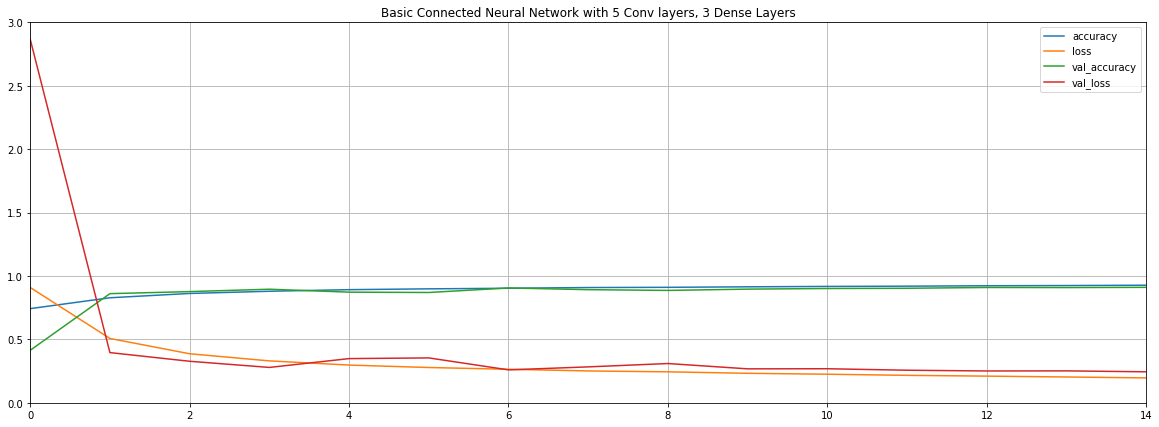

In [7]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(CNN_S_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 3)
plt.title("Basic Connected Neural Network with 5 Conv layers, 3 Dense Layers")
plt.show()

<h4><font color ='purple'>Results Interpretation for Basic CNN:</font></h4>
* From the Model Summary we can see that Total Trainable Parameters are 4,910,500 which is huge given that our total observations were at 120,000 approx, so this model may overfit but perrform's better than the Convolutional Neural networks.

* From the Plot we can see that Validation loss is decreasing ,the validation accuracy seems to increase from 41% to 91.04% by epoch 15. On the other hand training loss tend to decrease and accuracy scores tend to increase with increase in epochs. upon looking the Trainig accuracy score and Validation accuracy, scores seems close to each other with a differnce of 1% which is a good sign.
Since this model seems to perform well on the data so we further look at the model performance with augmented Data.

THE OUTPUT MAY VARY IF THE CELL IS RAN AGAIN.

In [67]:
CNN_S_probabilities = CNN_S.predict([images_test_public_rs]) # Predicting the Probabilities

In [68]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(CNN_S_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 2 0 ... 0 0 2]
Length of Predicted labels: 11921


In [69]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail()

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [70]:
# Joining the two data frames through the index
CNN_S_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [71]:
CNN_S_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\CNN_S_45693242.csv', index = False, header=True)

In [73]:
CNN_S.save("CNN_S.h5")  ## Best MOdel So For In CNN with 92.7 on the test data 

<h4><font color ='purple'>Kaggle Result:</font></h4>
Upon looking at the Kaggle scores the accuracy for the Basic Model on the Public data is 0.92743. which is good and is the best of all the models

<h3><font color ='brown'>Model 2: CNN with Data Augmentation (Selected Model in Deep Learning)</font></h3>

In [8]:
CNN_S_OA_DA = tf.keras.models.load_model('CNN_S.h5') # Loading the Model

In [13]:
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range = 0.1,
                             shear_range = 0.2,
                             horizontal_flip = True, 
                             fill_mode='nearest')
# Techniques for Data Augmemtation

In [14]:
x_Train_After_Augmentation = images_train_rs
datagen.fit(x_Train_After_Augmentation)

In [15]:
batch_size = 300
CNN_S_OA_DA_Output = CNN_S_OA_DA.fit(datagen.flow(x_Train_After_Augmentation, labels_train_rs, 
                         batch_size),
                         steps_per_epoch = len(x_Train_After_Augmentation)/batch_size,
                         epochs = 9, 
                         validation_data=(images_val_rs, labels_val_rs),
                         verbose=1)

Epoch 1/9
329/328 [==============================] - 64s 196ms/step - accuracy: 0.9019 - loss: 0.2703 - val_accuracy: 0.8950 - val_loss: 0.2839
Epoch 2/9
329/328 [==============================] - 64s 196ms/step - accuracy: 0.9033 - loss: 0.2666 - val_accuracy: 0.8650 - val_loss: 0.3293
Epoch 3/9
329/328 [==============================] - 65s 197ms/step - accuracy: 0.9038 - loss: 0.2626 - val_accuracy: 0.8703 - val_loss: 0.3265
Epoch 4/9
329/328 [==============================] - 76s 233ms/step - accuracy: 0.9047 - loss: 0.2616 - val_accuracy: 0.9007 - val_loss: 0.2638
Epoch 5/9
329/328 [==============================] - 77s 234ms/step - accuracy: 0.9066 - loss: 0.2560 - val_accuracy: 0.9157 - val_loss: 0.2319
Epoch 6/9
329/328 [==============================] - 73s 221ms/step - accuracy: 0.9080 - loss: 0.2533 - val_accuracy: 0.9077 - val_loss: 0.2426
Epoch 7/9
329/328 [==============================] - 66s 201ms/step - accuracy: 0.9084 - loss: 0.2519 - val_accuracy: 0.9008 - val_loss:

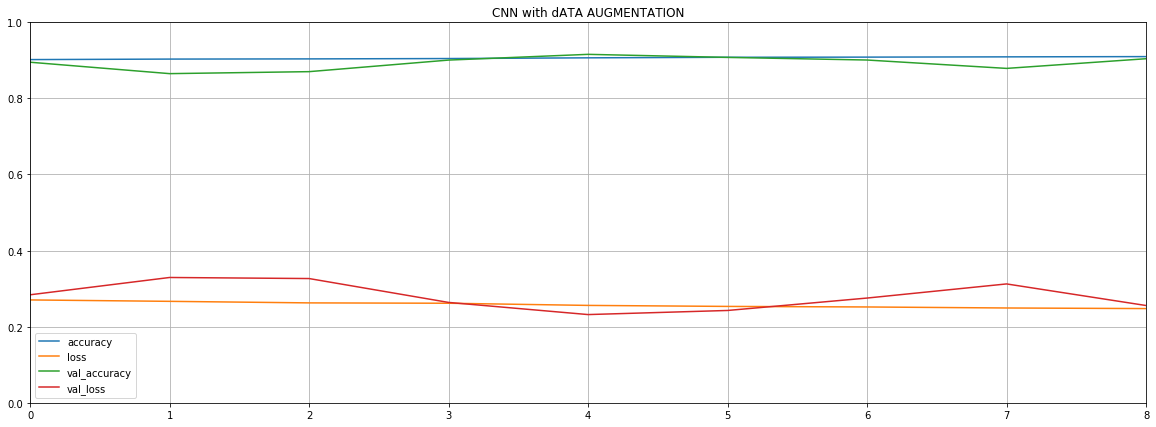

In [16]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(CNN_S_OA_DA_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("CNN with dATA AUGMENTATION")
plt.show()

<h4><font color ='purple'>Results Interpretation for Basic CNN with Data Augmentation:</font></h4>

* From the Plot we can see that Validation seems to fluctuate and is decreasing on slow steady rate and the validation accuracy seems to increase and reach 90.42% by epoch 9. On the other hand training loss tend to decrease and accuracy scores tend to increase with increase in epochs. upon looking the Trainig accuracy score and Validation accuracy scores seems close to each other with a differnce of 0.4% which is similar to Basic CNN Model. 
* I will be using this model as my Selecetd CNN model from deep learning model because, this model has a better chance of classifying the images that include some filters in it, which is not possible with the Basic CNN.

THE OUTPUT MAY VARY IF THE CELL IS RAN AGAIN.

In [26]:
CNN_S_DA_probabilities = CNN_S_OA_DA.predict([images_test_public_rs])

In [27]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(CNN_S_DA_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 1 0 ... 0 0 2]
Length of Predicted labels: 11921


In [28]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail()

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [29]:
# Joining the two data frames through the index
CNN_S_DA_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [30]:
CNN_S_DA_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\CNN_Final2_45693242.csv', index = False, header=True)

In [31]:
CNN_S_OA_DA.save("CNN_S_OA_DA.h5")  # Best Model So for with Data Augmentation

<h4><font color ='purple'>Kaggle Result:</font></h4>
Upon looking at the Kaggle scores the accuracy for the Basic Model with Data Augmentation on the Public data is 0.92618. which is good and is the better than the BAsic CNN due to the added advantage of classifying the images with more intense filiters.

<h3><font color ='brown'>Model 1: TRANSFER LEARNING with VGG19</font></h3>
There are several CNN model's that performed well on the Imagenet dataset which is mixture of 1000 classes with a million of pictures. So,we can make use of the information from lower layers of the Already trained models and modify the uppr layers such that the situtaion suits our case, in doing so we can expect better accuracy scores compared to the basic CNN that we build.

In this section I will be focusing on VGG19 Model, I had even tried other Transfer learning models like Resnet, Mobilenetv2 but not included in this final version because of their poor performance on the validation data as well as training data.

In [4]:
input_shape = (48,48,3)

<h4><font color ='Purple'>TRANSFER LEARNING with VGG19 by freezing all the layers</font></h4>
As a first step I am looking at how the model performs when all the layers were frozen (such that weights are fixed). VGG19 with input shape (48,48,3), imagenet weigths are used. 

In [35]:
vgg = VGG19(input_shape=input_shape, weights='imagenet', include_top=False)
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [36]:
#Freezing all layers in VGG19 so that the weights wont be changed
for layer in vgg.layers:
    layer.trainable = False
    print("The Layer "+layer.name+" is Successfully Frozen")

The Layer input_2 is Successfully Frozen
The Layer block1_conv1 is Successfully Frozen
The Layer block1_conv2 is Successfully Frozen
The Layer block1_pool is Successfully Frozen
The Layer block2_conv1 is Successfully Frozen
The Layer block2_conv2 is Successfully Frozen
The Layer block2_pool is Successfully Frozen
The Layer block3_conv1 is Successfully Frozen
The Layer block3_conv2 is Successfully Frozen
The Layer block3_conv3 is Successfully Frozen
The Layer block3_conv4 is Successfully Frozen
The Layer block3_pool is Successfully Frozen
The Layer block4_conv1 is Successfully Frozen
The Layer block4_conv2 is Successfully Frozen
The Layer block4_conv3 is Successfully Frozen
The Layer block4_conv4 is Successfully Frozen
The Layer block4_pool is Successfully Frozen
The Layer block5_conv1 is Successfully Frozen
The Layer block5_conv2 is Successfully Frozen
The Layer block5_conv3 is Successfully Frozen
The Layer block5_conv4 is Successfully Frozen
The Layer block5_pool is Successfully Froze

In [37]:
# We take the output coming from the last layer and feed i to the last newly added layers of our own
vgg_last  = vgg.layers[-1].output
new_layer = Flatten()(vgg_last) # Flattening the output layer of vgg
new_layer = Dense(1000, activation = "selu", name = "DenseFullyConnected")(new_layer) # new dense layer adding to the vgg
new_layer = Dropout(0.2) (new_layer) # new Drop out layer
new_layer = Dense(num_classes, activation="softmax", name="Predictions") (new_layer) # new output layer adding to the dense layer
model     = Model(vgg.input, new_layer) # building the model
# Compiling the model
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [38]:
vgg1_Output = model.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=15,
                       validation_data=(images_val_rs, labels_val_rs))

Train on 98479 samples, validate on 12270 samples
Epoch 1/15
98479/98479 [==============================] - 73s 741us/step - loss: 0.7727 - accuracy: 0.6739 - val_loss: 0.7044 - val_accuracy: 0.7022
Epoch 2/15
98479/98479 [==============================] - 63s 640us/step - loss: 0.6856 - accuracy: 0.7112 - val_loss: 0.6697 - val_accuracy: 0.7145
Epoch 3/15
98479/98479 [==============================] - 64s 645us/step - loss: 0.6673 - accuracy: 0.7210 - val_loss: 0.6732 - val_accuracy: 0.7152
Epoch 4/15
98479/98479 [==============================] - 63s 642us/step - loss: 0.6599 - accuracy: 0.7245 - val_loss: 0.6528 - val_accuracy: 0.7219
Epoch 5/15
98479/98479 [==============================] - 64s 646us/step - loss: 0.6527 - accuracy: 0.7268 - val_loss: 0.6788 - val_accuracy: 0.7104
Epoch 6/15
98479/98479 [==============================] - 63s 643us/step - loss: 0.6464 - accuracy: 0.7294 - val_loss: 0.6574 - val_accuracy: 0.7206
Epoch 7/15
98479/98479 [==============================] 

<h4><font color ='purple'>Results Interpretation of Transfer Learning using VGG19 :</font></h4>
* From the Model Summary we can see that Total Trainable Parameters are 517,004 (Total Parameters are: 20,541,388) which is because we frezed all the layer in  between such that weights will be fixed, our Observations data sits around 120,000 approx which is 3 times less than the parameters.

* From the scores we can see that Validation loss is decreasing but the validation accuracy is not increasing and is staying constant around 71% and 74%, the same goes for the training scores as well. The Training accuracy is 74.29 , the Validation accuracy is 73.81 we can see that now the model is not performing good upon freezing all the layers.

* So, it's better if we train some last layers.

THE OUTPUT MAY VARY IF THE CELL IS RAN AGAIN.

<h4><font color ='Purple'>TRANSFER LEARNING with VGG19 by un-freezing some layers</font></h4>
The VGG model is not performing well on the data with freezing all the layers because the final layers may contain different information which is not usefull or irrelevant for our data classification. So, we now train 20% of the layers from the bottom so that we make use of features from lower layers which are usefull and train the rest of the unfrozen layers along with the Dense layers.

In [13]:
vgg1 = VGG19(input_shape=input_shape, weights='imagenet', include_top=False)
#Freezing all layers in VGG19 so that the weights wont be changed
for layer in vgg1.layers:
    if layer.name == "block4_conv1":
        break
    layer.trainable = False
    print("The Layer "+layer.name+" is Successfully Frozen")

The Layer input_4 is Successfully Frozen
The Layer block1_conv1 is Successfully Frozen
The Layer block1_conv2 is Successfully Frozen
The Layer block1_pool is Successfully Frozen
The Layer block2_conv1 is Successfully Frozen
The Layer block2_conv2 is Successfully Frozen
The Layer block2_pool is Successfully Frozen
The Layer block3_conv1 is Successfully Frozen
The Layer block3_conv2 is Successfully Frozen
The Layer block3_conv3 is Successfully Frozen
The Layer block3_conv4 is Successfully Frozen
The Layer block3_pool is Successfully Frozen


In [14]:
# We take the output coming from the last layer and feed i to the last newly added layers of our own
vgg_last1  = vgg1.layers[-1].output
new_layer = Flatten()(vgg_last1) # Flattening the output layer of vgg
new_layer = Dense(1000, activation = "selu", name = "DenseFullyConnected")(new_layer) # new dense layer adding to the vgg
new_layer = Dropout(0.2) (new_layer) # new Drop out layer
new_layer = Dense(num_classes, activation="softmax", name="Predictions") (new_layer) # new output layer adding to the dense layer
model     = Model(vgg1.input, new_layer) # building the model
# Compiling the model
model.summary()
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [15]:
#https://towardsdatascience.com/cnn-transfer-learning-fine-tuning-9f3e7c5806b2
vgg1_Output = model.fit(images_train_rs, labels_train_rs,
                       batch_size=300,
                       epochs=12,
                       validation_data=(images_val_rs, labels_val_rs))

Train on 98479 samples, validate on 12270 samples
Epoch 1/12
98479/98479 [==============================] - 109s 1ms/step - loss: 0.8070 - accuracy: 0.6572 - val_loss: 0.5414 - val_accuracy: 0.7947
Epoch 2/12
98479/98479 [==============================] - 109s 1ms/step - loss: 0.4192 - accuracy: 0.8390 - val_loss: 0.4522 - val_accuracy: 0.8187
Epoch 3/12
98479/98479 [==============================] - 110s 1ms/step - loss: 0.3547 - accuracy: 0.8634 - val_loss: 0.3344 - val_accuracy: 0.8747
Epoch 4/12
98479/98479 [==============================] - 110s 1ms/step - loss: 0.3246 - accuracy: 0.8765 - val_loss: 0.3209 - val_accuracy: 0.8793
Epoch 5/12
98479/98479 [==============================] - 110s 1ms/step - loss: 0.3075 - accuracy: 0.8838 - val_loss: 0.3040 - val_accuracy: 0.8868
Epoch 6/12
98479/98479 [==============================] - 110s 1ms/step - loss: 0.2965 - accuracy: 0.8872 - val_loss: 0.3070 - val_accuracy: 0.8819
Epoch 7/12
98479/98479 [==============================] - 109s

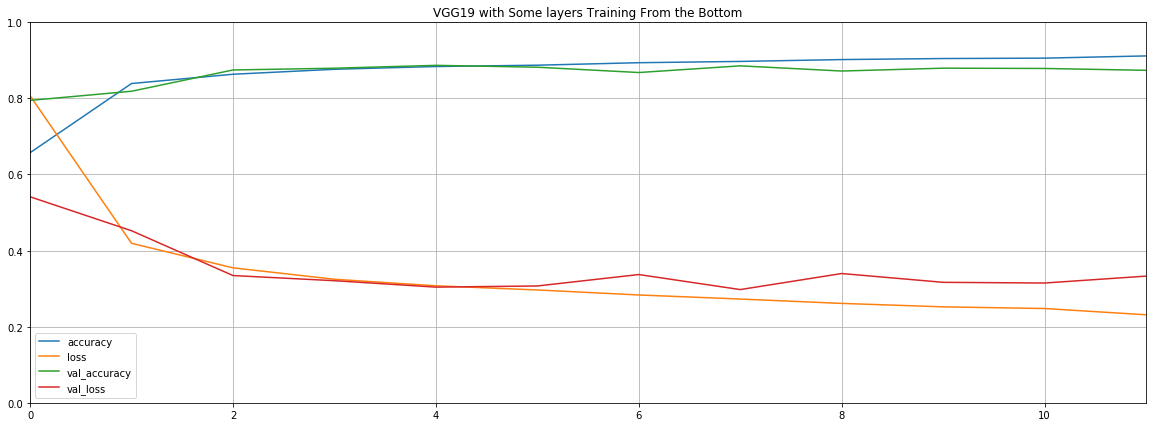

In [16]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(vgg1_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("VGG19 with Some layers Training From the Bottom")
plt.show()

<h4><font color ='Purple'>Result Interpretation for TRANSFER LEARNING with VGG19 by unfreezing some layers</font></h4>
* From the Model Summary we can see that Total Trainable Parameters are 18,215,820 which is because we had unfrozen 40% of the layer's, our Observations data sits around 120,000 approx which is very less compared to current parameters.

* From the plot we can see that Validation loss is decreasing with a spike in between but the validation accuracy is increasing and reaching upto 87.30, on the other hand the training loss is decreasing with the increase in training accuracy. The Training accuracy is 91.16, the Validation accuracy is 87.38 we can say that this model is performing good upon compared to the one with freezing all the layers.

So we further try to increase the Performance with some data augmentation.
THE OUTPUT MAY VARY IF THE CELL IS RAN AGAIN.

In [58]:
Vgg1_probabilities = model.predict([images_test_public_rs])

In [59]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(Vgg1_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

the first five Predicted classes are: [0 2 0 ... 0 0 2]
Length of Predicted labels: 11921


In [60]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])

In [61]:
# Joining the two data frames through the index
VGG19_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [62]:
VGG19_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\VGG19_45693242.csv', index = False, header=True)

In [63]:
model.save("VGG19Final.h5")  #Saving the Model so far it is the second best model which is closer to the base model

<h4><font color ='purple'>Kaggle Result:</font></h4>
Upon looking at the Kaggle scores the accuracy for the Basic Model with Data Augmentation on the Public data is 91.5% which is good and is not better than the BAsic CNN but has an added advantage of classifying the images with more intense filiters.

<h4><font color ='Purple'>TRANSFER LEARNING with VGG19 by un-freezing some layers along with Data Augmentation</font></h4>
Now we increase the performance of Transfer learning (some layers trainable) by using Some Augmented Data.

In [17]:
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range = 0.1,
                             shear_range = 0.2,
                             horizontal_flip = True, 
                             fill_mode='nearest')

x_Train_After_Augmentation = images_train_rs
datagen.fit(x_Train_After_Augmentation)
vgg_DA = tf.keras.models.load_model('VGG19Final.h5')
batch_size = 300
VGGF_DA_Output = vgg_DA.fit(datagen.flow(x_Train_After_Augmentation, labels_train_rs, 
                         batch_size),
                         steps_per_epoch = len(x_Train_After_Augmentation)/batch_size,
                         epochs = 15, 
                         validation_data=(images_val_rs, labels_val_rs),
                         verbose=1)

Epoch 1/15
329/328 [==============================] - 104s 315ms/step - loss: 0.3773 - accuracy: 0.8546 - val_accuracy: 0.8570 - val_loss: 0.3639
Epoch 2/15
329/328 [==============================] - 101s 308ms/step - loss: 0.3507 - accuracy: 0.8671 - val_accuracy: 0.8816 - val_loss: 0.3105
Epoch 3/15
329/328 [==============================] - 102s 309ms/step - loss: 0.3434 - accuracy: 0.8691 - val_accuracy: 0.8607 - val_loss: 0.3671
Epoch 4/15
329/328 [==============================] - 102s 309ms/step - loss: 0.3326 - accuracy: 0.8739 - val_accuracy: 0.8880 - val_loss: 0.2890
Epoch 5/15
329/328 [==============================] - 102s 309ms/step - loss: 0.3270 - accuracy: 0.8762 - val_accuracy: 0.8835 - val_loss: 0.3029
Epoch 6/15
329/328 [==============================] - 105s 318ms/step - loss: 0.3244 - accuracy: 0.8774 - val_accuracy: 0.8550 - val_loss: 0.3640
Epoch 7/15
329/328 [==============================] - 109s 332ms/step - loss: 0.3281 - accuracy: 0.8748 - val_accuracy: 0.87

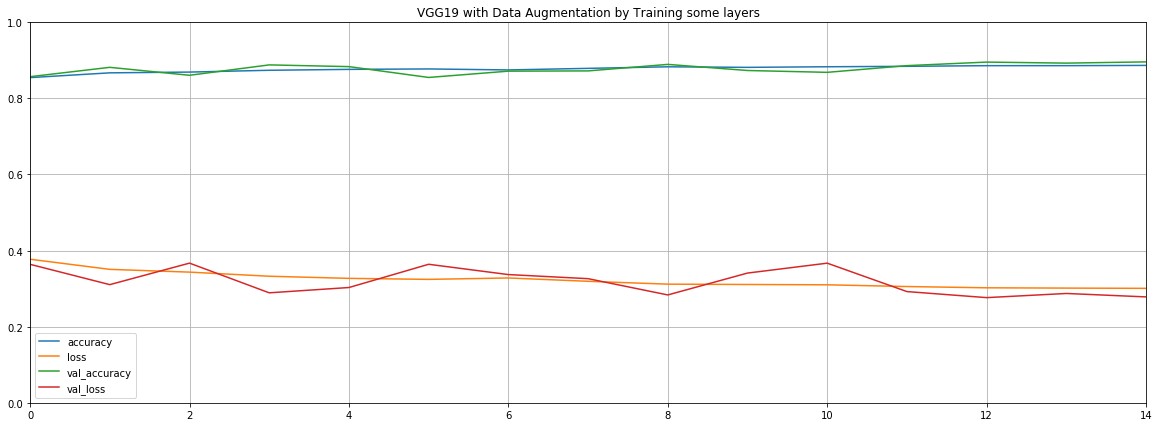

In [18]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(VGGF_DA_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("VGG19 with Data Augmentation by Training some layers")
plt.show()

<h4><font color ='Purple'>TRANSFER LEARNING with VGG19 by un-freezing some layers</font></h4>

* From the plot we can see that Validation loss is decreasing and increasing between the given range of epochs but the validation accuracy is increasing slightly and reaching closely to the training accuracy, on the other hand the training loss is decreasing with the increase in training accuracy. The Training accuracy is 88.67 , the Validation accuracy is 89.59 we can say that this model is performing good upon compared to the one with freezing all the layers and the one with some unfrozen layers.

* I will be Using this Model as the 2nd Best from Deep Learning Section since the Performance of this model and the Basic CNN wtih Data Augmentation has same performance on both test/public and Private Data.

THE OUTPUT MAY VARY IF THE CELL IS RAN AGAIN.

In [66]:
Vgg2_probabilities = vgg_DA.predict([images_test_public_rs])
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(Vgg2_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_public, columns=['ID'])

the first five Predicted classes are: [0 2 0 ... 0 0 1]
Length of Predicted labels: 11921


In [67]:
# Joining the two data frames through the index
VGG19FDA_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [68]:
VGG19FDA_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\VGG19FDA_45693242.csv', index = False, header=True)

<h4><font color ='purple'>Kaggle Result:</font></h4>
Upon looking at the Kaggle scores the accuracy for the Basic Model with Data Augmentation on the Public data is 91.83% which is good and is not better than the BAsic CNN but has an added advantage of classifying the images with more intense filiters due to Data Augmentation.

Interpreting the Results For Both Selected Deep Learning and Additional Deep learning model and about the selected Hyper parameters choosen.

 <h2><center><font color ='Red'>Section-6: Result's Interpretation for both Candidate Models and Hyper parameter choosing</font></center></h2>

 <h4><center><font color ='Red'>Below is the code for predicting on the Private Data</font></center></h4>

 <h4><font color ='purple'>Loading the Private Data:</font></h4>

In [ ]:
images_test_private = np.load(join(dataset_directory, 'test_private_images.npy'))
files_test_private = np.load(join(dataset_directory, 'test_private_files.npy'))
images_test_private_rs = images_test_private.reshape([-1, image_size, image_size, 3]) / 255.0 # normalizing the values
print("Test Data Shape:", images_test_private_rs.shape)

 <h4><font color ='purple'>1) Fitting the VGG19 with Data Augmentation for predicting on the Private Data:</font></h4>

In [ ]:
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range = 0.1,
                             shear_range = 0.2,
                             horizontal_flip = True, 
                             fill_mode='nearest')

x_Train_After_Augmentation = images_train_rs
datagen.fit(x_Train_After_Augmentation)
vgg_DA = tf.keras.models.load_model('VGG19Final.h5')
batch_size = 300
VGGF_DA_Output = vgg_DA.fit(datagen.flow(x_Train_After_Augmentation, labels_train_rs, 
                         batch_size),
                         steps_per_epoch = len(x_Train_After_Augmentation)/batch_size,
                         epochs = 15, 
                         validation_data=(images_val_rs, labels_val_rs),
                         verbose=1)

In [ ]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(VGGF_DA_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Fully Connected Neural Network with 4 Hidden layers")
plt.show()

In [ ]:
Vgg1_probabilities = vgg_DA.predict([images_test_private_rs])

In [ ]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(Vgg1_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

In [ ]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_private, columns=['ID'])

In [ ]:
VGG19_45693242 = df2.merge(df1, left_index=True, right_index=True)
VGG19_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\VGG19_TF_DA_45693242.csv', index = False, header=True)
vgg_DA.save("VGG19PTFDAFinal.h5")

 <h4><font color ='purple'>2) Fitting the Selected Candidate Model which is Basic CNN with Data Augmentation:</font></h4>

In [ ]:
CNN_S_OA_DA = tf.keras.models.load_model('CNN_S.h5') # Loading the Model

In [ ]:
datagen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=1,
                             height_shift_range=1,
                             zoom_range = (0.5, 1.5),
                             shear_range = 0.2,                                             
                             horizontal_flip = True, 
                             fill_mode='nearest',
                            )
# Techniques for Data Augmemtation
x_Train_After_Augmentation = images_train_rs
datagen.fit(x_Train_After_Augmentation)

In [ ]:
batch_size = 300
CNN_S_OA_DA_Output = CNN_S_OA_DA.fit(datagen.flow(x_Train_After_Augmentation, labels_train_rs, 
                         batch_size),
                         steps_per_epoch = len(x_Train_After_Augmentation)/batch_size,
                         epochs = 15, 
                         validation_data=(images_val_rs, labels_val_rs),
                         verbose=1)

In [ ]:
# Plotting the accuray and loss for training and validation data
pd.DataFrame(CNN_S_OA_DA_Output.history).plot(figsize=(20, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Fully Connected Neural Network with 4 Hidden layers AND dATA AUGMENTATION")
plt.show()

In [ ]:
CNN_S_DA_probabilities = CNN_S_OA_DA.predict([images_test_private_rs])

In [ ]:
#### Converting the one hot encoding probability values back to a single column representing wich class does an image belongs to 
Pred_Labels = np.argmax(CNN_S_DA_probabilities, axis = 1)
print("the first five Predicted classes are:", Pred_Labels)
print("Length of Predicted labels:", len(Pred_Labels))

In [ ]:
# creating a data frame for predicted values
df1 = pd.DataFrame(Pred_Labels, columns=['Prediction'])
# creating a data frame for files_val which contains image names
df2 = pd.DataFrame(files_test_private, columns=['ID'])
# Joining the two data frames through the index
CNN_S_DA_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [ ]:
CNN_S_DA_45693242.to_csv (r'C:\\Users\\suhas\\Documents\\study\\ML Practice\\CNN_S_DA_Private_45693242.csv', index = False, header=True)

 <h3><center><font color ='purple'>Result Interpretation For Basic CNN with Data Augmentation:</font></center></h3> 
 
 1. The Selected Deep Learning Model (Basic CNN with Data Augmentation) Performance on the Private data upon submitting in the Kaggle has come up to 60.96 where as on the pubilc data the accuracy has come up to 92% approx.
 2. The reason for this Poor performance is that the private images contain a large no of pictures which contains hat and Bald headed people so model has some difficulty in classifying whether an image belongs one of the given hair color. The second reason is that ost of the images were augmented som ehave a rotation of about 40 degrees while some images have flipping in it thereby this inturn will affect the model's performance.
 3. In Kaggle for Private Data The model with highest accuracy is 66.134, the model with lowest accuracy is 0.377738. My model performance sits some what closer to the model with accuracy lying between 60 and 64 because the random weights that are initalized at the begining will affect on the accuracy that is achieved by a model each time we run.
 
 <h3><center><font color ='purple'>Result Interpretation For Transfer Learning with Data Augmentation using VGG19:</font></center></h3> 
 
    1. Transfer Learning with VGG19 (Including Data Augmentation) Performance on the Private data upon submitting in the Kaggle has come up to 60.00 approx where as on the pubilc data the accuracy has come up to 91.83% approx.
    2. The reason for this Poor performance is that the private images contain a large no of pictures which contains hat and Bald headed people so model has some difficulty in classifying whether an image belongs one of the given hair color. The second reason is that ost of the images were augmented som ehave a rotation of about 40 degrees while some images have flipping in it thereby this inturn will affect the model's performance.
    3. In Kaggle for Private Data The model with highest accuracy is 66.134, the model with lowest accuracy is 0.377738. My model performance sits some what closer to the model with accuracy lying between 60 and 64 because the random weights that are initalized at the begining will affect on the accuracy that is achieved by a model each time we run.
 
 
 <h4><center><font color ='purple'>Hyper Parameter Tuning For Basic CNN with Data Augmentation:</font></center></h4>
 
 1. Based on my Intial workings I found that the optimal accuracy score can be achived with having 4 conv layers along with some normalization and drop out layers. The more layers will eventually result in overfitting.
 2. THe best values for the Techniques that are used in Data Augmention were based on my analysis on the private data, where I had a look at different images and decided on which values would best suite the current situation.
 3. While Building the CNN I used 5 Conv layer where the no of filters are increasing depending on the level the layer is used with more number of filters on the deeper layers since they have to identify complex features as well.
 4. I had used Selu as the Activation Function through out the Note book because the vanishing grdient problem does not occurs and gives better scores when compared to other activation functions.
 5. Dropout layer values is used as 0.4 since it will help the model not to overfit the data by dropping the neurons.
 6. Upper layers have Bigger kernel sizes compared to Deeper layers having smaller kernel size. 


 <h2><center><font color ='Red'>Section-7: Best Models Comparison from Conventional and Convolutional sides: </font></center></h2>

1. My Best Model From Conventional Model is SVM with (c=25, gamma="auto", random_state = 26) which performed well on the public data with an accuracy of 0.87685.
2. My Best Model from Basic CNN with Data Augmentation has performed very well on the Public data with an accuraacy of 92.743. which is approxly 5% more than SVM.
3. My Best Model from Basic CNN with Data Augmentation has performed very well on the Private data as well with an accuracy of 60.9%. 
4. My best Model from Basic CNN with Data Augmentation has attained 34th place.

Regarding on the other aspects of Results Interpretaion for both selected modles has explained in the above Section (Section 6).